<a href="https://colab.research.google.com/github/anesukafesu/calculus_assignment/blob/main/PLD4_Calculus_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 0: Imports and Setup

Importing necessary libraries for this notebook.

*   SymPy is used for symbolic computations when calculating gradients and solving equations
*   Matplotlib is used for plotting diagrams
*   NumPy is used for dealing with vector data efficiently



In [6]:
from sympy import diff, Symbol
from sympy.solvers import solve
import matplotlib.pyplot as plt
import numpy as np

# Task 1: Write a dynamic function to find the derivative of any function f(x)

In [10]:
def dy_dx(f):
  """ Calculates the derivative of any function with respect to x
  Args:
    f Sympy expression to differentiate defined in terms of Symbol('x')
  Returns:
    The derivative with respect to x of f as a SymPy Expression
  """
  # Create the symbol x with respect to which we will differentiate f
  x = Symbol('x')

  # Use the built-in diff method to differentiate the function
  return diff(f, x)

# Task 2: Test the derivative function written with an equation of your choice

To find a polynomial that has 4 inflection points, we reversed the stationary point finding process.

Generally, to find stationary points one starts with a polynomial, differentiates it, equates it to zero and solves the resulting equation. The solutions of that equation are the stationary points.

As mentioned earlier, we reversed this process. We started with the stationary points we wanted and worked our way up to the polynomial that has those stationary process. Here's the process we followed.

## The Algorithm

1. Arbitrarily define stationary points, in our case x=1, x=2, x=3 and x=4.
2. Form the equation that has those points as the solution. That equation will be the gradient function of the polynomial we are after. In our case, the equation with the points we picked as a solution is (x-1)(x-2)(x-3)(x-4) = 0.
3. We can stop equating it zero since we are not searching for stationary points anymore. Therefore (x-1)(x-2)(x-3)(x-4) = 0, becomes (x-1)(x-2)(x-3)(x-4).
4. Expand the expression to express is as a sum of functions rather than a product of functions. In our case, that meant expanding it to x^4 - 10x^3 + 35x^2 - 50x + 24.
4. Integrate the gradient function to get the polynomial. x^5/5 - 10x^4 + 35x^3/3 - 25x^2 + 24x + C
5. Substitute C with any value you prefer. Any value is valid because it does not change the shape of the graph. Rather it shifts the graph along the y-axis. We gave it a value of -7 which shifted the graph downwards so that the stationary points are near the x-axis.



In [53]:
def f(x):
  """ Returns f of any value
  where f(x) -> (0.2 * x**5) - (2.5 * x**4) + ((35/3) * x**3) - (25 * x**2) + (24 * x) - 7
  Args:
    x (int | float | numpy.ndarray | sympy.Symbol)
  Returns:
    (float | numpy.ndarray | sympy.Expression)
  """
  return (0.2 * x**5) - (2.5 * x**4) + ((35/3) * x**3) - (25 * x**2) + (24 * x) - 7

# Testing the derivative function
print("Testing the derivative function")
x = Symbol('x')
print('Original function:', f(x))
print('First derivative:', dy_dx(f(x)))

Testing the derivative function
Original function: 0.2*x**5 - 2.5*x**4 + 11.6666666666667*x**3 - 25*x**2 + 24*x - 7
First derivative: 1.0*x**4 - 10.0*x**3 + 35.0*x**2 - 50*x + 24


In [52]:
# Example usage of f(x)
# With a constant
example_with_constant = f(2)

# With a symbol
x = Symbol('x')
example_with_symbol = f(x)

# With a numpy.ndarray
array = np.array([0, 1, 2, 3, 4])
example_with_ndarray = f(array)

print("Example with constant:", example_with_constant)
print("Example with symbol:", example_with_symbol)
print("Example with numpy.ndarray:", example_with_ndarray)

Example with constant: 0.7333333333333272
Example with symbol: 0.2*x**5 - 2.5*x**4 + 11.6666666666667*x**3 - 25*x**2 + 24*x - 7
Example with numpy.ndarray: [-7.          1.36666667  0.73333333  1.1         0.46666667]


#Task 3: Plotting a graph of the equation

## Finding the minimas and maximas

In [54]:
# Array of minimas and maximas
arr_minimas = []
arr_maximas = []

# Creating a symbol x to represent the variable x
x = Symbol('x')

# Calculating first derivative of f(x)
f_prime = dy_dx(f(x))

# Calculating second derivative of f(x)
f_prime_prime = dy_dx(f_prime)

# Calculating the stationary_points
stationary_points = solve(f_prime)

# Classifying each point as either minima or maxima
for x in stationary_points:

  # Calculate the y value of the point
  y = f(x)

  # Calculating the value of the concave at point
  concave = f_prime_prime.evalf(subs={'x': x})

  # Creating the point as a dictionary
  point = { 'x': x, 'y': y}

  # If the concave is greater than zero, the point is a minima
  if concave > 0:
    arr_minimas.append(point)

  # If the concave is less than zero, the point is a maxima
  if concave < 0:
    arr_maximas.append(point)

# Printing out the minimas and maximas
print(f'The array of minimas {arr_minimas} and the array of maximas is {arr_maximas}')

The array of minimas [{'x': 2.00000000000000, 'y': 0.733333333333327}, {'x': 4.00000000000000, 'y': 0.466666666666640}] and the array of maximas is [{'x': 1.00000000000000, 'y': 1.36666666666667}, {'x': 3.00000000000000, 'y': 1.09999999999999}]


## Finding the global minimas and maximas

In [55]:
# Finding the global maximum

# Initialise the highest y value so far as -infinity
highest_y = float('-inf')

# Initialise the global_maximum to None
global_maximum = None

# Loop through the array of maximas
for point in arr_maximas:

  # If it exceeds the highest_y seen so far
  if point['y'] > highest_y:

    # That becomes our new global_maximum
    global_maximum = point

    # And we update the highest_y seen so far
    highest_y = point['y']


# Finding the global minimum

# Initialise the lowest y value so far as -infinity
lowest_y = float('inf')

# Initialise the global_minimum to None
global_minimum = None

# Loop through the array of minimas
for point in arr_minimas:

  # If it's lower than the lowest_y seen so far
  if point['y'] < lowest_y:

    # That becomes our new global_minimum
    global_minimum = point

    # And we update the lowest_y seen so far
    lowest_y = point['y']

# Printing the global maximum and global minimum
print(f'The global maxima is {global_maximum}')
print(f'The global minima is {global_minimum}')

The global maxima is {'x': 1.00000000000000, 'y': 1.36666666666667}
The global minima is {'x': 4.00000000000000, 'y': 0.466666666666640}


## Finally plotting the graph, showing the stationary points, global minima and global maxima

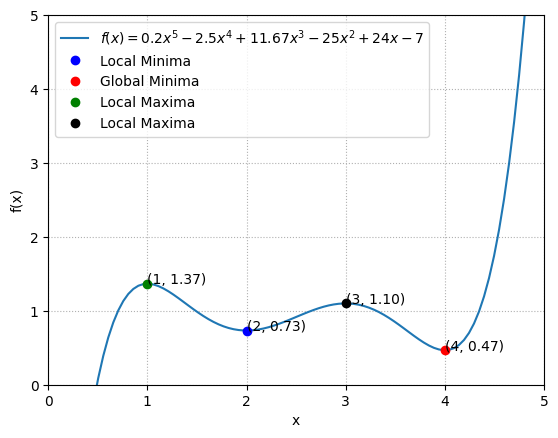

In [64]:
# Generating 100 points between 0 and 5
X = np.linspace(0, 5, 100)

# Calculating Y values of said points
Y = f(X)

# Line plot label
label = '$f(x)=0.2x^5 - 2.5x^4 + 11.67x^3 - 25x^2 + 24x - 7$'

# Plotting the X and Y values
plt.plot(X, Y, label=label)

# Setting the axes limits
plt.ylim((0, 5))
plt.xlim((0, 5))

# Labelling the axes
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot the minimas
for point in arr_minimas:

  # Extracting the coordinates
  x = point['x']
  y = point['y']

  # Creating the label and marker
  marker = 'ro' if point is global_minimum else 'bo'
  label = 'Global Minima' if point is global_minimum else 'Local Minima'

  # Plotting the points
  plt.plot(x, y, marker, label=label)
  plt.text(x, y, f'({x:.0f}, {y:.2f})')

# Plot the maximas
for point in arr_maximas:

  # Extract the coordinates
  x = point['x']
  y = point['y']

  # Creating the label and marker
  marker = 'go' if point is global_minimum else 'ko'
  label = 'Global Maxima' if point is global_minimum else 'Local Maxima'

  # Plotting the points
  plt.plot(x, y, 'go' if point is global_maximum else 'ko', label=label)
  plt.text(x, y, f'({x:.0f}, {y:.2f})')

# Showing the legend
plt.legend()

# Adding grid lines
plt.grid(linestyle='dotted')

# Showing the plot
plt.show()

# Task 4: Create separate array of Minimas and maximas

In [66]:
# Array of minimas and maximas
arr_minimas = []
arr_maximas = []

# Creating a symbol x to represent the variable x
x = Symbol('x')

# Calculating first derivative of f(x)
f_prime = dy_dx(f(x))

# Calculating second derivative of f(x)
f_prime_prime = dy_dx(f_prime)

# Calculating the stationary_points
stationary_points = solve(f_prime)

# Classifying each point as either minima or maxima
for x in stationary_points:

  # Calculate the y value of the point
  y = f(x)

  # Calculating the value of the concave at point
  concave = f_prime_prime.evalf(subs={'x': x})

  # Creating the point as a dictionary
  point = { 'x': x, 'y': y}

  # If the concave is greater than zero, the point is a minima
  if concave > 0:
    arr_minimas.append(point)

  # If the concave is less than zero, the point is a maxima
  if concave < 0:
    arr_maximas.append(point)

# Printing out the minimas and maximas
print(f'The array of minimas {arr_minimas} and the array of maximas is {arr_maximas}')

The array of minimas [{'x': 2.00000000000000, 'y': 0.733333333333327}, {'x': 4.00000000000000, 'y': 0.466666666666640}] and the array of maximas is [{'x': 1.00000000000000, 'y': 1.36666666666667}, {'x': 3.00000000000000, 'y': 1.09999999999999}]


# Plotting the Global Minima and Maxima

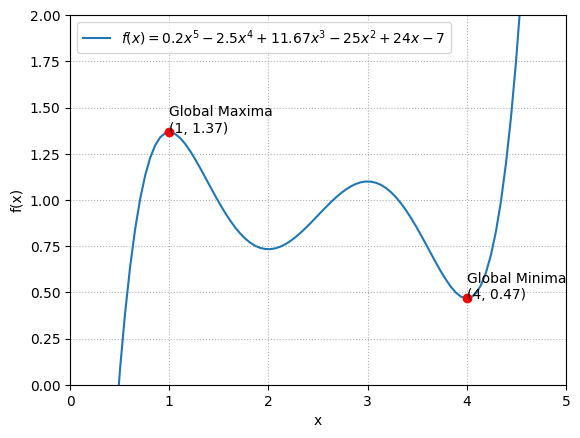

In [65]:
# Plotting the global minima and maxima
# Generating 100 points between 0 and 5
X = np.linspace(0, 5, 100)

# Calculate the critical points
x = Symbol('x')
f_prime = dy_dx(f(x))
stationary_points = np.array(solve(f_prime))

# Calculating Y values of said points
Y = f(X)

# Line plot label
label = '$f(x)=0.2x^5 - 2.5x^4 + 11.67x^3 - 25x^2 + 24x - 7$'

# Plotting the X and Y values
plt.plot(X, Y, label=label)

# Setting the axes limits
plt.ylim((0, 2))
plt.xlim((0, 5))

# Labelling the axes
plt.xlabel('x')
plt.ylabel('f(x)')

# Plot the global maxima points
x = global_maximum['x']
y = global_maximum['y']
plt.plot(x, y, 'ro')
plt.text(x, y, f'Global Maxima\n({x:.0f}, {y:.2f})')

# Plot the global minima points
x = global_minimum['x']
y = global_minimum['y']
plt.plot(x, y, 'ro')
plt.text(x, y, f'Global Minima\n({x:.0f}, {y:.2f})')

# Showing the legend
plt.legend()

# Adding grid lines
plt.grid(linestyle='dotted')

# Showing the plot
plt.show()